In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('data.csv')

In [5]:
def interests_formating(interests):
    if pd.notna(interests):
        return [interest.strip() for interest in interests.split('|')]
    else:
        None
df['interests']=df['interests'].apply(interests_formating)

In [6]:
df

,cookie,email,phone_number,country,state,city,age,gender,income,education,interests,created_at
0,7321e278-6ff0-4be0-88ea-ca5e66167f30,margaret.lopez286@yahoo.com,1.933725e+10,UK,Scotland,NaN,56.0,Male,NaN,Master's Degree,None,2024-11-25 09:20:18
1,6aa10155-48e0-4b3d-8912-db20a3572f3f,ashley.johnson39@outlook.com,1.247328e+10,Brazil,Rio de Janeiro,NaN,57.0,Other,"$75,000-$99,999",NaN,[Tech],2024-06-29 09:20:18
2,b7de83d3-96b9-407e-b8be-895df53539d5,kimberly.green646@gmail.com,1.233246e+10,USA,Pennsylvania,NaN,40.0,Prefer not to say,"$150,000+",Trade School,"[Music, Tech]",2025-01-20 09:20:18
3,b075bc71-5e61-4303-9fca-22ddbd0e9172,jennifer.williams499@yahoo.com,1.577936e+10,Germany,Berlin,NaN,61.0,Prefer not to say,NaN,Some College,"[Photography, Art, Education]",2024-08-26 09:20:18
4,1ba38a54-94c9-405a-9066-f961f63baa10,margaret.lopez286@yahoo.com,1.523982e+10,USA,New York,New York City,30.0,Other,NaN,NaN,"[Gaming, Finance, Education, Fashion, Art]",2024-12-31 09:20:18
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8335572c-4836-48e8-aa7a-7509f40d0aac,patricia.green512@protonmail.com,1.744309e+10,India,Karnataka,NaN,18.0,Male,"$150,000+",Master's Degree,"[Health, Art]",2024-04-01 09:20:18
9996,4d8b034c-2e7f-4415-8cda-3881874fde56,emily.davis715@hotmail.com,1.832881e+10,Brazil,São Paulo,São José dos Campos,NaN,Prefer not to say,"$25,000-$49,999",Doctorate,"[Health, Tech, Travel, Food]",2025-01-11 09:20:18
9997,3785fd9e-8ba9-48e9-9ca4-43bc234b2553,david.baker938@hotmail.com,1.887902e+10,UK,Wales,NaN,48.0,Female,NaN,Some College,"[Food, Health, Travel]",2024-03-27 09:20:18
9998,ee68034b-5994-4b62-a849-f123fb609ea5,mark.nelson993@gmail.com,1.785056e+10,UK,Scotland,NaN,65.0,NaN,NaN,High School,"[Gaming, Fashion, Food, Travel]",2024-10-16 09:20:18


In [8]:
df=df.explode(column='interests')

In [ ]:
df['age']=df['age'].astype(int)
df['age']=df['age'].replace('Unknown','0')

In [10]:
df[['country','age','gender','income','education','interests']]

,country,age,gender,income,education,interests
0,UK,56.0,Male,NaN,Master's Degree,None
1,Brazil,57.0,Other,"$75,000-$99,999",NaN,Tech
2,USA,40.0,Prefer not to say,"$150,000+",Trade School,Music
2,USA,40.0,Prefer not to say,"$150,000+",Trade School,Tech
3,Germany,61.0,Prefer not to say,NaN,Some College,Photography
...,...,...,...,...,...,...
9998,UK,65.0,NaN,NaN,High School,Travel
9999,France,33.0,Prefer not to say,"Under $25,000",Master's Degree,Art
9999,France,33.0,Prefer not to say,"Under $25,000",Master's Degree,Gaming
9999,France,33.0,Prefer not to say,"Under $25,000",Master's Degree,Fashion


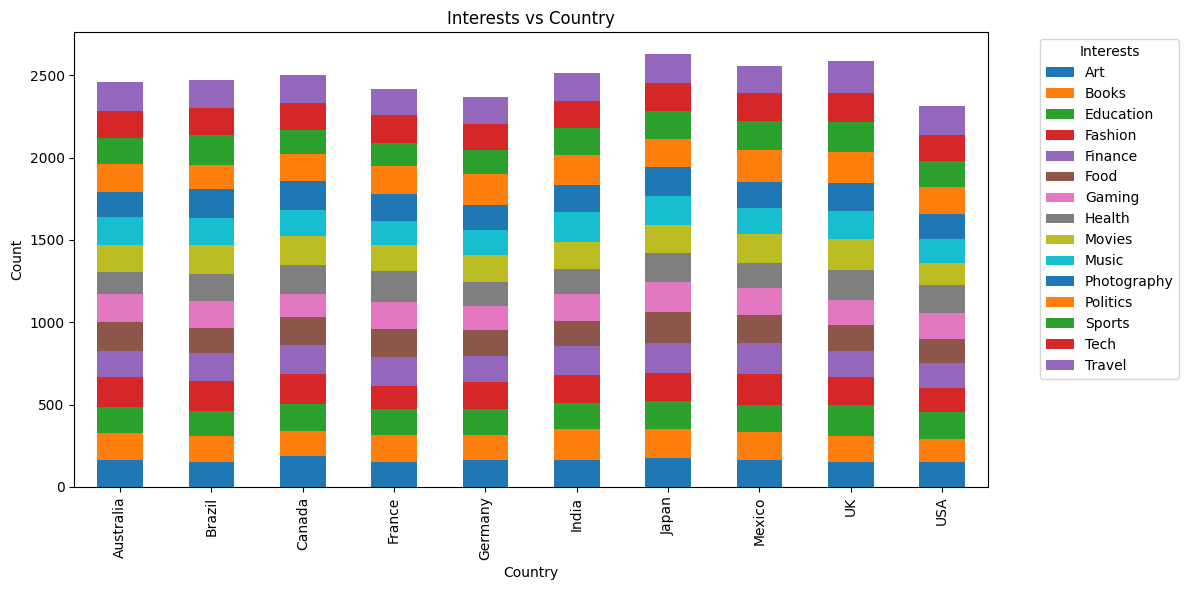

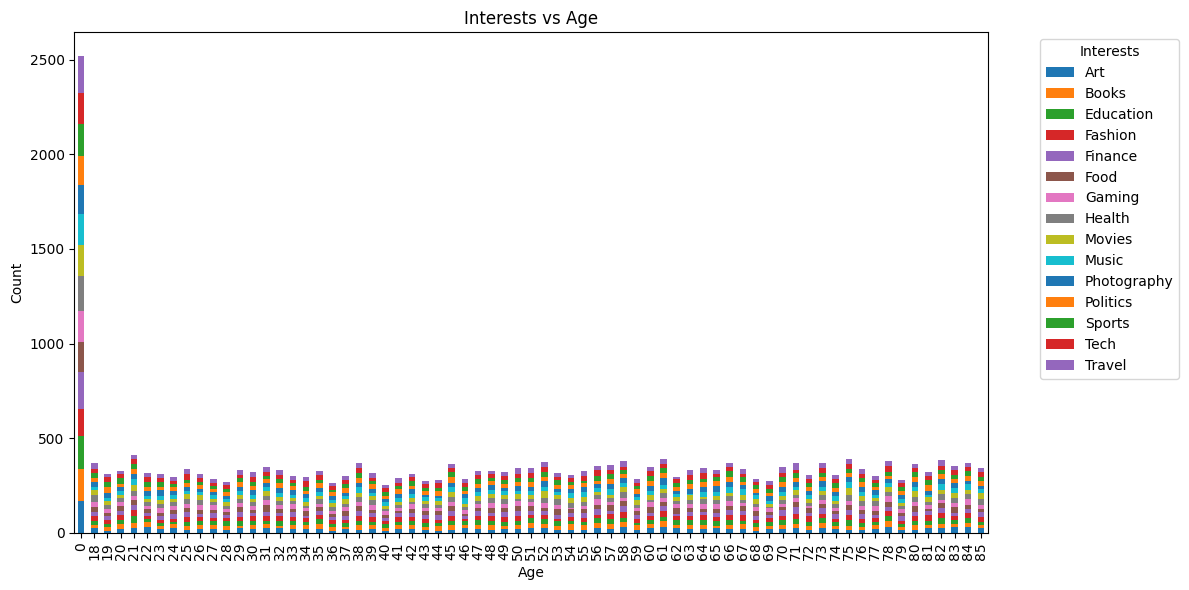

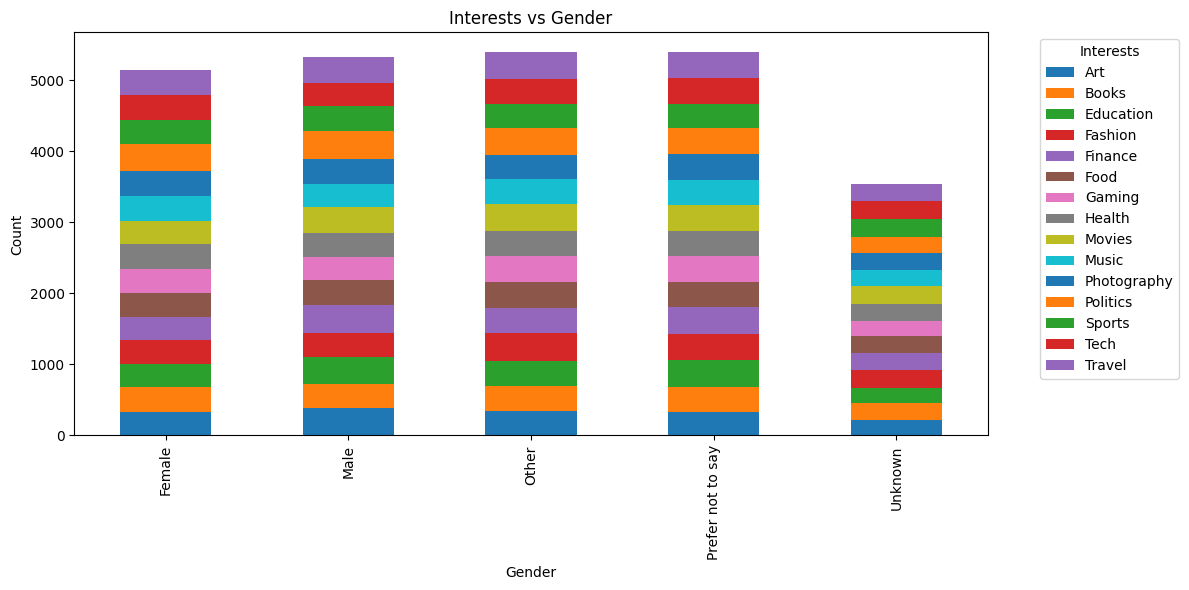

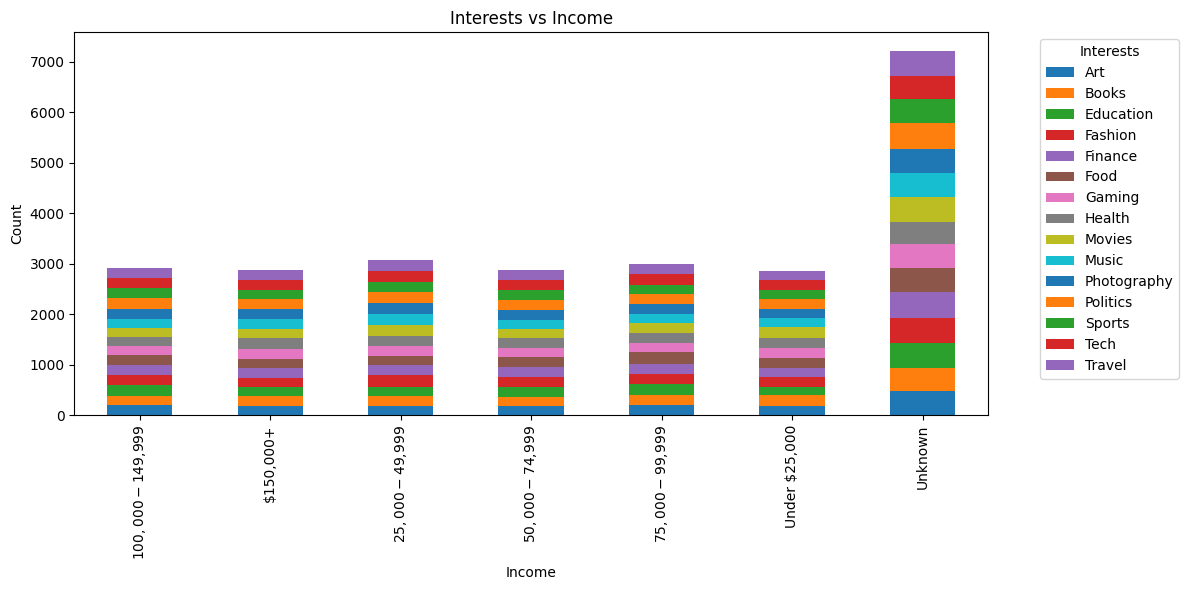

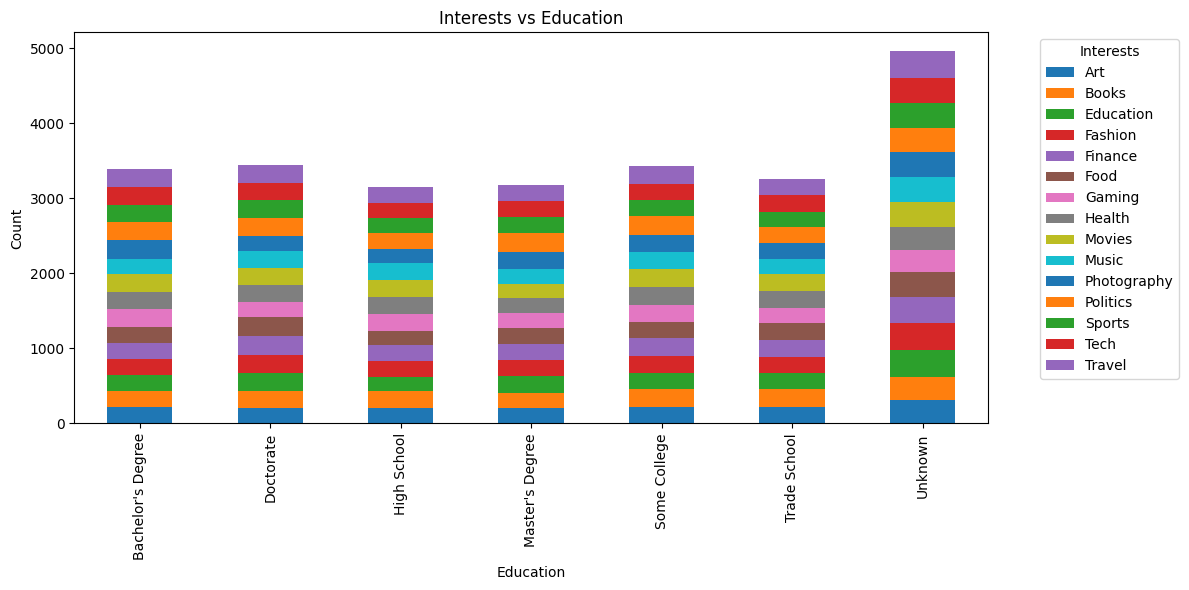

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop rows with missing interests
df = df.dropna(subset=['interests'])

# Fill other missing values with 'Unknown'
df = df.fillna('Unknown')

# Optional: remove duplicate rows
df = df.drop_duplicates()

# Define columns to analyze
columns_to_compare = ['country', 'age', 'gender', 'income', 'education']

# Plot stacked bar charts
for col in columns_to_compare:
    cross_tab = pd.crosstab(df[col], df['interests'])

    # Sort index if it's age or income for better readability
    if col == 'age':
        cross_tab = cross_tab.sort_index()

    # Plot
    cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Interests vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Interests', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [18]:
import pandas as pd

# Load the data

# Columns to compare with interests
columns_to_compare = ['country', 'age', 'gender', 'income', 'education']

# Store pivot tables in a dictionary
pivot_tables = {}

for col in columns_to_compare:
    pivot = pd.crosstab(df[col], df['interests'])
    pivot_tables[col] = pivot

# Example: Access pivot table for 'country'
print("Interests vs Country")
print(pivot_tables['country'])

# You can also export them if needed
# pivot_tables['country'].to_csv('interests_vs_country.csv')


Interests vs Country
interests  Art  Books  Education  Fashion  Finance  Food  Gaming  Health  \
country                                                                    
Australia  165    165        157      183      158   175     167     137   
Brazil     149    157        157      181      168   155     163     164   
Canada     187    155        164      178      177   168     141     178   
France     152    164        154      142      177   171     165     185   
Germany    163    154        157      164      159   157     144     149   
India      163    186        162      166      176   152     167     150   
Japan      177    172        174      170      179   189     185     175   
Mexico     163    168        169      184      192   169     163     152   
UK         149    162        189      165      160   159     153     183   
USA        152    139        163      149      151   144     159     169   

interests  Movies  Music  Photography  Politics  Sports  Tech  Tra

In [20]:
pivot_tables['age']

interests,Art,Books,Education,Fashion,Finance,Food,Gaming,Health,Movies,Music,Photography,Politics,Sports,Tech,Travel
age,,,,,,,,,,,,,,,
0,167,173,170,144,198,158,160,189,164,160,154,153,172,160,196
18,25,18,19,25,26,25,26,37,26,17,25,22,27,22,32
19,12,18,18,22,21,14,21,23,21,17,24,32,25,29,15
20,20,27,23,25,23,25,20,20,17,24,18,18,31,21,17
21,28,27,32,33,29,24,21,27,30,35,27,27,23,26,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,24,19,21,29,23,12,18,20,23,14,21,30,24,22,20
82,24,23,31,27,25,28,17,29,23,31,28,25,23,22,27
83,30,15,24,23,16,30,20,28,27,24,26,23,22,27,21


In [21]:
pivot_tables['education']

interests,Art,Books,Education,Fashion,Finance,Food,Gaming,Health,Movies,Music,Photography,Politics,Sports,Tech,Travel
education,,,,,,,,,,,,,,,
Bachelor's Degree,225,210,212,213,206,217,237,227,242,206,245,247,226,239,235
Doctorate,212,225,237,240,248,254,206,222,234,216,210,228,244,235,236
High School,210,223,182,213,216,194,220,229,219,230,194,212,195,199,210
Master's Degree,212,194,222,218,215,208,203,202,191,199,221,249,212,221,215
Some College,221,233,222,221,237,214,236,229,239,238,227,251,210,211,237
Trade School,223,230,213,220,229,219,207,225,227,195,213,218,203,221,219
Unknown,317,307,358,357,346,333,298,308,321,335,332,326,333,337,356


In [22]:
pivot_tables['income']

interests,Art,Books,Education,Fashion,Finance,Food,Gaming,Health,Movies,Music,Photography,Politics,Sports,Tech,Travel
income,,,,,,,,,,,,,,,
"$100,000-$149,999",201,178,219,207,196,198,178,176,181,178,190,221,204,190,195
"$150,000+",187,191,171,193,189,177,201,211,184,203,194,203,179,196,194
"$25,000-$49,999",173,212,182,221,199,176,197,212,217,223,216,206,212,215,212
"$50,000-$74,999",179,187,197,193,207,184,186,196,186,178,190,197,192,201,210
"$75,000-$99,999",207,195,218,192,205,226,189,195,197,174,209,188,182,210,205
"Under $25,000",185,210,170,182,190,189,196,206,209,184,182,190,191,188,191
Unknown,488,449,489,494,511,489,460,446,499,479,461,526,463,463,501
